Jacob Knopping
1/3/2020

## 16.6 Assignment: Data Exlploration II

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

# no need for an open connection, 
# as we're only doing a single query
engine2.dispose()

### Data Cleaning:

In [2]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values.

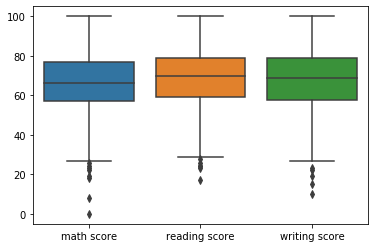

In [4]:
sns.boxplot(data=student_df)

There are lower bound outliers.

Text(0.5, 1.0, 'Winsorized Writing Score')

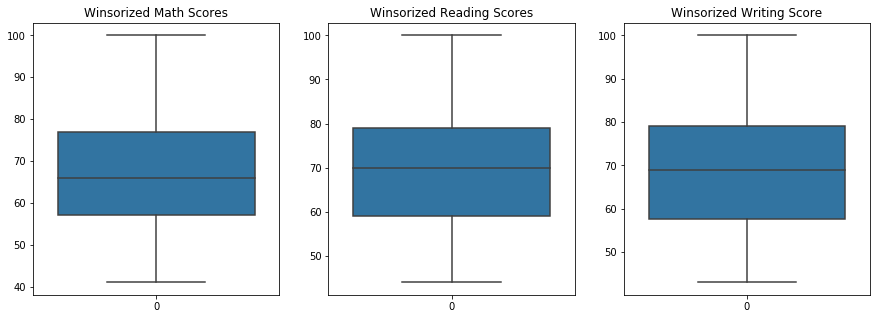

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
winsorized_math = winsorize(student_df['math score'], (.05, 0))
sns.boxplot(data = winsorized_math)
plt.title('Winsorized Math Scores')

plt.subplot(1,3,2)
winsorized_reading = winsorize(student_df['reading score'], (.05, 0))
sns.boxplot(data = winsorized_reading)
plt.title('Winsorized Reading Scores')

plt.subplot(1,3,3)
winsorized_writing = winsorize(student_df['writing score'], (.05, 0))
sns.boxplot(data = winsorized_writing)
plt.title('Winsorized Writing Score')

Winsorization eliminated lower bound outliers.

In [6]:
student_df['winsorized_math_score'] = winsorized_math
student_df['winsorized_reading_score'] = winsorized_reading
student_df['winsorized_writing_score'] = winsorized_writing

print(student_df.describe())
student_df.head()

       math score  reading score  writing score  winsorized_math_score  \
count  1000.00000    1000.000000    1000.000000            1000.000000   
mean     66.08900      69.169000      68.054000              66.508000   
std      15.16308      14.600192      15.195657              14.202875   
min       0.00000      17.000000      10.000000              41.000000   
25%      57.00000      59.000000      57.750000              57.000000   
50%      66.00000      70.000000      69.000000              66.000000   
75%      77.00000      79.000000      79.000000              77.000000   
max     100.00000     100.000000     100.000000             100.000000   

       winsorized_reading_score  winsorized_writing_score  
count               1000.000000               1000.000000  
mean                  69.507000                 68.443000  
std                   13.844046                 14.336048  
min                   44.000000                 43.000000  
25%                   59.000000  

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized_math_score,winsorized_reading_score,winsorized_writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74
1,female,group C,some college,standard,completed,69,90,88,69,90,88
2,female,group B,master's degree,standard,none,90,95,93,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44
4,male,group C,some college,standard,none,76,78,75,76,78,75


Summary statistics are not dramatically affected by winsorization.

In [7]:
#Math Score Outliers
print('MATH SCORES')
print("TUKEY'S METHOD")
q75, q25 = np.percentile(student_df['math score'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((student_df['math score'] > max_val) 
                      | (student_df['math score'] < min_val))[0]))
    ))

print('-------------------------------------------------')
print('MATH SCORES')
print('Z SCORE METHOD')
from scipy.stats import zscore

z_scores = zscore(student_df['math score'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
#Reading Score Outliers
print('READING SCORES')
print("TUKEY'S METHOD")
q75, q25 = np.percentile(student_df['reading score'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((student_df['reading score'] > max_val) 
                      | (student_df['reading score'] < min_val))[0]))
    ))

print('-------------------------------------------------')
print('READING SCORES')
print('Z SCORE METHOD')
from scipy.stats import zscore

z_scores = zscore(student_df['reading score'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    
#Writing Score Outliers
print('WRITING SCORES')
print("TUKEY'S METHOD")
q75, q25 = np.percentile(student_df['writing score'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((student_df['writing score'] > max_val) 
                      | (student_df['writing score'] < min_val))[0]))
    ))

print('-------------------------------------------------')
print('WRITING SCORES')
print('Z SCORE METHOD')
from scipy.stats import zscore

z_scores = zscore(student_df['writing score'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

MATH SCORES
TUKEY'S METHOD
The score threshold is: 1.0
Number of outliers is: 42
The score threshold is: 1.5
Number of outliers is: 8
The score threshold is: 2.0
Number of outliers is: 2
The score threshold is: 2.5
Number of outliers is: 1
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
-------------------------------------------------
MATH SCORES
Z SCORE METHOD
The score threshold is: 1
The indices of the outliers:
(array([  2,   6,  16,  34,  49,  53,  56, 102, 104, 106, 114, 115, 121,
       122, 124, 125, 128, 130, 132, 144, 146, 149, 160, 165, 171, 179,
       206, 214, 215, 216, 221, 223, 229, 233, 234, 239, 245, 246, 263,
       268, 274, 275, 276, 286, 288, 291, 299, 306, 317, 325, 328, 333,
       334, 349, 361, 370, 373, 377, 381, 397, 403, 407, 409, 411, 415,
       420, 426, 439, 447, 451, 458, 465, 469, 470, 474

The potential outliers do not have a significant impact on descriptive statistics, and are not considered to be outliers by both the Z Score and Tukey's method of detecting outliers, depending on the threshold. Therefore, proceed with the original dataset (do not use winsorized values).

### Answers:

In [8]:
#Restore original dataset without winsorized values:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

# no need for an open connection, 
# as we're only doing a single query
engine2.dispose()

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [9]:
#student_df.groupby('gender').mean()[["math score", "reading score", "writing score"]]
#same as:
student_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [10]:
#Testing if these differences are significant:
from scipy.stats.stats import ttest_ind

for score in ['math score', 'reading score', 'writing score']:
    print('t-test for {}: '.format(score))
    print(ttest_ind(student_df.loc[student_df.gender == 'male'][score],
    student_df.loc[student_df.gender == 'female'][score]))

t-test for math score: 
Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)
t-test for reading score: 
Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)
t-test for writing score: 
Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)


In [11]:
student_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [12]:
#Testing if these differences are significant:

ethnicities = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                student_df[student_df["race/ethnicity"]
                           == ethnicities[i]][var],
                student_df[student_df["race/ethnicity"] == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


In [13]:
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [14]:
#Testing if these differences are significant:

education_level = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(education_level)):
        for j in range(i+1, len(education_level)):
            print(
                "t-test between groups {0} and {1}:".format(education_level[i], education_level[j]))
            print(ttest_ind(
                student_df[student_df["parental level of education"]
                           == education_level[i]][var],
                student_df[student_df["parental level of education"]
                           == education_level[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [15]:
#student_df.head()
student_df.groupby('lunch').mean()[['math score', 'reading score', 'writing score']]
#or:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [16]:
f_r = student_df.loc[student_df.lunch == 'free/reduced']
std = student_df.loc[student_df.lunch == 'standard']

In [17]:
from scipy.stats.stats import ttest_ind

for score in ['math score', 'reading score', 'writing score']:
    print(ttest_ind(f_r[score], std[score]))

Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)
Ttest_indResult(statistic=-7.451056467473455, pvalue=2.0027966545279011e-13)
Ttest_indResult(statistic=-8.009784197834758, pvalue=3.186189583166477e-15)


There are significant differences between all three scores (math, reading, writing) for students eating standard lunches and students eating free/reduced lunches. Students who have standard lunches are more successful.

3. Does the test preparation course seem to have an effect on the exam performances?

In [18]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
student_df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]
#student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [20]:
prep_yes = student_df.loc[student_df['test preparation course'] == 'completed']
prep_no = student_df.loc[student_df['test preparation course'] == 'none']

for score in ['math score', 'reading score', 'writing score']:
    print(ttest_ind(prep_yes[score], prep_no[score]))

Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)
Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)
Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)


Students who have completed the test preparation course perform significantly higher.

4. Which two exam scores are correlated the most with each other?

In [21]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1, 'Exam Score Correlations')

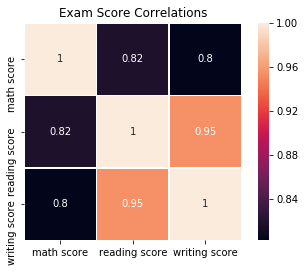

In [22]:
sns.heatmap(student_df.corr(), square=True, annot=True, linewidths=0.5).set_title('Exam Score Correlations')


Reading and writing are correlated the most with eachother than any other combination.